In [3]:
import pyvisa
from PIL import Image
from IPython.display import display
from datetime import datetime

rm = pyvisa.ResourceManager()
rm.list_resources()

inst = rm.open_resource('TCPIP::192.168.23.150::INSTR')
print(inst.query("*IDN?"))

RIGOL TECHNOLOGIES,MSO5072,MS5A210700340,00.01.03.03.00



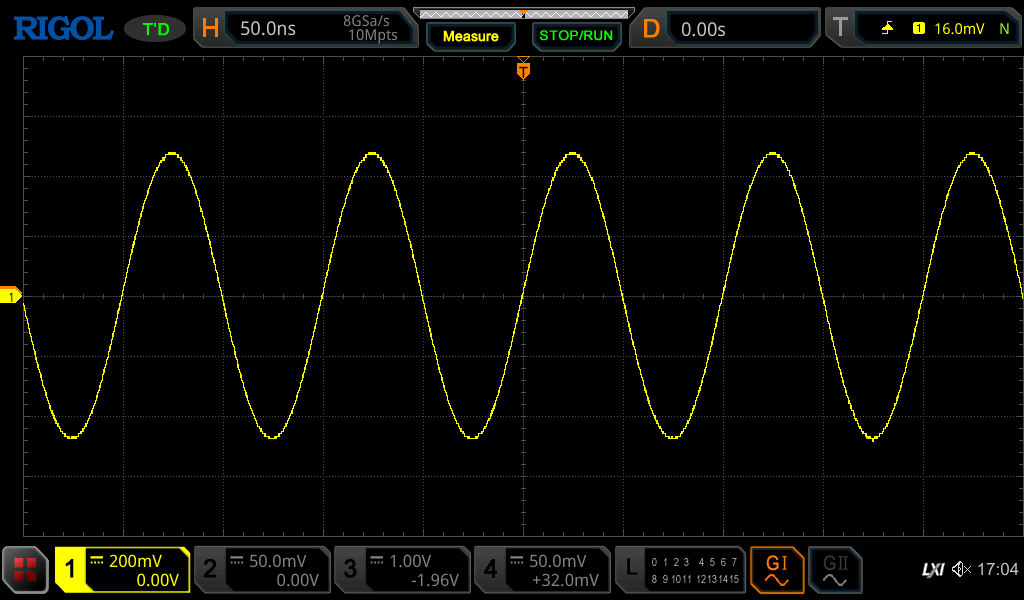

In [6]:
file_name = f'rigol_screen_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.bmp'
image_data = inst.query_binary_values(':DISPlay:DATA?', datatype='B', header_fmt='ieee', container=bytes)
with open(file_name, 'wb') as f:
    f.write(image_data)

display(Image.open(file_name))

Setup the instrument for downloading waveform data from channel 1

In [15]:
inst.write(':WAVeform:SOURce CHANnel1')
inst.write(':WAVeform:MODE NORMal')
inst.write(':WAVeform:FORMat ASCii')
inst.write(':WAVeform:POINts NORMal')

25

In [18]:
# wav_data = inst.query_binary_values(':WAV:DATA?', datatype='B', header_fmt='ieee', container=bytes)
# wav_data = inst.query_ascii_values(':WAV:DATA?')
inst.write(':WAV:DATA?')
wav_data = inst.read_raw().decode('utf-8')

print(wav_data)

b'#9000014000-2.557908E-02,-4.263180E-02,-5.115816E-02,-7.673724E-02,-8.526359E-02,-1.108427E-01,-1.108427E-01,-1.364218E-01,-1.364218E-01,-1.620008E-01,-1.705272E-01,-1.961063E-01,-1.961063E-01,-2.216853E-01,-2.216853E-01,-2.557908E-01,-2.557908E-01,-2.728435E-01,-2.728435E-01,-2.984226E-01,-2.984226E-01,-3.154753E-01,-3.240017E-01,-3.410544E-01,-3.410544E-01,-3.581071E-01,-3.666335E-01,-3.836862E-01,-3.836862E-01,-3.922125E-01,-4.007389E-01,-4.092653E-01,-4.177916E-01,-4.263180E-01,-4.263180E-01,-4.433707E-01,-4.433707E-01,-4.518971E-01,-4.518971E-01,-4.604234E-01,-4.604234E-01,-4.689498E-01,-4.689498E-01,-4.689498E-01,-4.689498E-01,-4.774761E-01,-4.774761E-01,-4.774761E-01,-4.774761E-01,-4.774761E-01,-4.774761E-01,-4.689498E-01,-4.774761E-01,-4.689498E-01,-4.689498E-01,-4.604234E-01,-4.604234E-01,-4.604234E-01,-4.604234E-01,-4.518971E-01,-4.518971E-01,-4.348443E-01,-4.348443E-01,-4.263180E-01,-4.263180E-01,-4.092653E-01,-4.092653E-01,-3.922125E-01,-3.922125E-01,-3.751598E-01,-3.7515

In [12]:
print(wav_data[:10])

b'\xb1\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb3\xb3'
